# Final Projects

1.Find the real roots of
\begin{equation}
x^4-6x^3+12.25x^2-11x+3.75=0
\end{equation}
using 1) bisection, and 2) Newton-Raphson methods.

### Answer
For Bisection, we perform the following steps:

1. Intiate the midpoint randomly from (a)-(b) (Arbitrary range)
2. Measure the value of the midpoint f(c) & see if it approaches 0 closely enough
3. Otherwise, we replace the range, a or b, with c.
4. Repeat for a specified number of times (specified iterations)
5. Repeat for every root

In [17]:
def f(x):
    return x**4 - 6*x**3 + 12.25*x**2-11*x+3.75

#Recall the bisection method from lecture 05
def bisection(xmin,xmax, Nmax, eps,f):
    for i in range(0,Nmax):
        x=(xmin+xmax)/2.
        if(f(xmin)*f(x)>0):
            xmin=x 
        else:
            xmax=x
        if(abs(f(x))<eps):
            print("Root is at",x," after ",i," iterations, with a precision of ",abs(f(x)))
            break
    return x

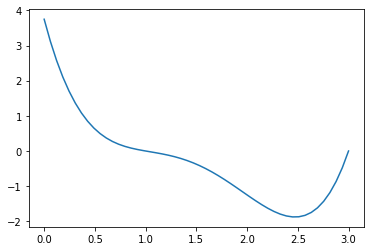

In [18]:
import matplotlib.pyplot as plt
import numpy as np


#First we visualize the function
x = np.linspace(0,3)
plt.plot(x, f(x))
plt.show()

We first set our limits from 0 to 1.5

In [20]:
a = 0
b = 2.5
iterations = 100
eps = 1e-8 #10^-8

x = bisection(a,b,iterations,eps,f)
print("Root found at: ", x)

Root is at 1.0000000149011612  after  24  iterations, with a precision of  7.450578820566989e-09
Root found at:  1.0000000149011612


We repeat again for 2.5 onward

In [21]:
a = 2.5
b = 10
iterations = 100
eps = 1e-8 #10^-8

x = bisection(a,b,iterations,eps,f)
print("Root found at: ", x)

Root is at 2.9999999998835847  after  31  iterations, with a precision of  9.89530235528946e-10
Root found at:  2.9999999998835847


This result coincides with our analytical results, which measure $1$ and $3$ as the final, real roots. Now we can repeat with $\mathbf{\textrm{the newton raphson method}}$

#### Newton Rapshon Method

To execute the newton raphson method well, we perform the following steps.

1. Start with a guess $x_0$ and check if it's a root
2. Correct it with $\Delta x = -\frac{f(x_0)}{f'(x_0)}$
3. Then update $x_0 = x_0 + \Delta x$
4. Repeat until we reach the end point with a sufficient accuracy

In [88]:
def f(x):
    return x**4 - 6*x**3 + 12.25*x**2-11*x+3.75

def central_diff(x, dx, f):
    """
    Uses input x, step size dx, and function f
    """
    return (f(x)*(x+dx/2) - f(x)*(x-dx/2))/dx

#Recall the newtonraphson method from lecture 5
def newtonraphson(x0,dx, Nmax, eps,f):
    for i in range(0,Nmax):
        if(abs(f(x0)) < eps):
            print("Root at ", x0, "with precision", f(x0))
            return x0
        df = central_diff(x0,dx,f)
        x0 -= f(x0)/df
        
    return x0

In [104]:
x_0 = np.random.randint(100)
iterations = 10000
eps = 10**-7 #10^-7

print("Initial x_0: ", x_0)
dx = 10**-6 #Optimal value for maximum precision


x = newtonraphson(x_0, dx, iterations, eps, f)
print("Newton Raphson finished at: ", x)

Initial x_0:  69
Root at  0.9999998908910508 with precision 5.455447738000885e-08
Newton Raphson finished at:  0.9999998908910508


Now we repeat this until we find a second root:

In [120]:
x_0 = np.random.randint(100)
iterations = 10000
eps = 10**-7 #10^-7

print("Initial x_0: ", x_0)
dx = 10**-6 #Optimal value for maximum precision


x = newtonraphson(x_0, dx, iterations, eps, f)
print("Newton Raphson finished at: ", x)

Initial x_0:  7
Root at  2.9999999982835415 with precision -1.4589893737593229e-08
Newton Raphson finished at:  2.9999999982835415


$This\ concludes\ our\ answer\ for\ question\ 1.$

2.Lorenz Attractors: In 1961, Edward Lorenz was using a simplified atmospheric convection model to predict weather patterns, when, as a shortcut, he entered the decimal 0.506 instead of entering the full 0.506 127 for a parameter in the model. The results for the two numbers were so different that at first he thought it to be a numerical error, but in time he realized that this was a nonlinear system with chaotic behavior. Now we want you to repeat this discovery. (Landau 379)

The equation used by Lorenz are
\begin{eqnarray}
dx/dt = \sigma(y-x)\\
dy/dt = x(\rho-z)-y\\
dz/dt = -\beta z+ xy\\
\end{eqnarray}

where x(t) is a measure of fluid velocity as a function of time t, y(t) and z(t) are measures of the temperature distributions in two directions, and $\sigma$, $\rho$, and $\beta$ are parameters. Note that the xz and xy terms make these equations nonlinear.

a) Modify your RK4 solver to solve these equations. 
Choose $\sigma=10$, $\rho=28$, and $\beta=8/3$, and the initial x,y,z are all  1. Integrate t to t=40. 

b) Integrate a short period of time (e.g. t=1) with different dt. Show the results converge to some values.  Plot the error with respect to dt. How fast the integrator converges? 

c) Make plots of x vs t, y vs t, and z vs t

d) Do a Fourier analysis for x vs t (run the code for a longer t=200). 

d) Make a “phase-space” plot of z(t) vs. x(t) (the independent variable t does not appear in such a plot).

e) The parameters given to you should lead to chaotic solutions. Start with two x values which are very close to each other, and show that they eventually diverges after some time. 


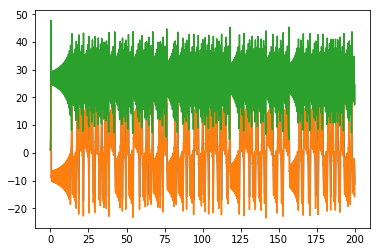

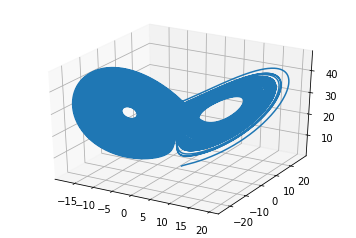

3.During the star formation, a gaseous disk forms around the young star. Since planets will form inside this disk, it is called the protoplanetary disks. The simplest model for studying the evolution of this disk is called the viscous disk model

\begin{equation}
\frac{\partial \Sigma}{\partial t}=\frac{3}{R}\frac{\partial}{\partial R}\left[R^{1/2}\frac{\partial}{\partial R}(\nu\Sigma R^{1/2})\right]
\end{equation}
Where R is the distance to the star, $\Sigma$ is the disk's surface density, and $\nu$ is the viscosity of the disk.
This equation is similar to the thermal diffusion equation. Use the method we learned in this class to solve this equation. Initialize the disk surface density with a gaussian at R=1. $\sigma$ for the gaussian is 0.1. Choose $\nu$=1. The simulation domain is from 0.1 to 2. At both boundary set the surface density to be 0 all the time. Choose the timestep of 0.1$\Delta$r$^2/\nu$ to be stable. Run your simulation to t=0.1 to see how the surface density evolves. 

0.0
3.6099999999999997e-05
7.219999999999999e-05
0.00010829999999999999
0.00014439999999999999
0.0001805
0.0002166
0.0002527
0.0002888
0.00032490000000000004
0.00036100000000000005
0.00039710000000000006
0.00043320000000000007
0.0004693000000000001
0.0005054
0.0005415
0.0005775999999999999
0.0006136999999999999
0.0006497999999999999
0.0006858999999999998
0.0007219999999999998
0.0007580999999999997
0.0007941999999999997
0.0008302999999999996
0.0008663999999999996
0.0009024999999999995
0.0009385999999999995
0.0009746999999999995
0.0010107999999999994
0.0010468999999999995
0.0010829999999999995
0.0011190999999999996
0.0011551999999999997
0.0011912999999999997
0.0012273999999999998
0.0012634999999999999
0.0012996
0.0013357
0.0013718
0.0014079000000000001
0.0014440000000000002
0.0014801000000000003
0.0015162000000000003
0.0015523000000000004
0.0015884000000000004
0.0016245000000000005
0.0016606000000000006
0.0016967000000000006
0.0017328000000000007
0.0017689000000000008
0.00180500000000000

0.047038299999999235
0.04707439999999923
0.04711049999999923
0.04714659999999923
0.047182699999999224
0.04721879999999922
0.04725489999999922
0.047290999999999216
0.04732709999999921
0.04736319999999921
0.04739929999999921
0.047435399999999205
0.0474714999999992
0.0475075999999992
0.047543699999999196
0.047579799999999194
0.04761589999999919
0.04765199999999919
0.047688099999999185
0.04772419999999918
0.04776029999999918
0.04779639999999918
0.047832499999999174
0.04786859999999917
0.04790469999999917
0.047940799999999166
0.04797689999999916
0.04801299999999916
0.04804909999999916
0.048085199999999155
0.04812129999999915
0.04815739999999915
0.04819349999999915
0.048229599999999144
0.04826569999999914
0.04830179999999914
0.048337899999999136
0.04837399999999913
0.04841009999999913
0.04844619999999913
0.048482299999999125
0.04851839999999912
0.04855449999999912
0.048590599999999116
0.048626699999999114
0.04866279999999911
0.04869889999999911
0.048734999999999105
0.0487710999999991
0.04880

0.08620679999999625
0.08624289999999625
0.08627899999999625
0.08631509999999624
0.08635119999999624
0.08638729999999624
0.08642339999999624
0.08645949999999623
0.08649559999999623
0.08653169999999623
0.08656779999999623
0.08660389999999622
0.08663999999999622
0.08667609999999622
0.08671219999999621
0.08674829999999621
0.08678439999999621
0.0868204999999962
0.0868565999999962
0.0868926999999962
0.0869287999999962
0.0869648999999962
0.08700099999999619
0.08703709999999619
0.08707319999999619
0.08710929999999618
0.08714539999999618
0.08718149999999618
0.08721759999999618
0.08725369999999617
0.08728979999999617
0.08732589999999617
0.08736199999999616
0.08739809999999616
0.08743419999999616
0.08747029999999616
0.08750639999999615
0.08754249999999615
0.08757859999999615
0.08761469999999615
0.08765079999999614
0.08768689999999614
0.08772299999999614
0.08775909999999613
0.08779519999999613
0.08783129999999613
0.08786739999999613
0.08790349999999612
0.08793959999999612
0.08797569999999612
0.088

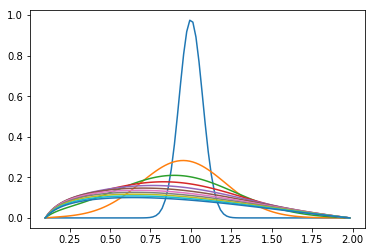